# Equivalent layer technique for estimating total magnetization direction using 

#### Importing libraries

In [1]:
% matplotlib inline 

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import datetime
import timeit
import string as st
from scipy.optimize import nnls
from fatiando.gridder import regular
from fatiando.utils import ang2vec, vec2ang
from fatiando.mesher import Sphere, PointGrid,Prism
from fatiando.gravmag import sphere,prism
from fatiando.constants import CM, T2NT, G, SI2MGAL

/home/andrelreis/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [3]:
notebook_name = 'airborne_EQL_magdirection_RM_calculation.ipynb'

#### Plot style

In [4]:
plt.style.use('ggplot')

#### Importing auxiliary functions

In [5]:
dir_modules = '../../../mypackage'
sys.path.append(dir_modules)

In [6]:
import auxiliary_functions as fc

#### Loading properties of the model

In [7]:
with open('data/model_multi.pickle') as f:
        model_multi = pickle.load(f)

#### Loading properties grid

In [8]:
with open('data/airborne_survey.pickle') as f:
        airborne = pickle.load(f)

#### Loading data

In [9]:
with open('data/data_set.pickle') as f:
        data = pickle.load(f)

#### Open a dictionary

In [10]:
result_RM_airb = dict()

### Saving files

In [11]:
saved_files = []

## Observation area

In [12]:
print 'Area limits: \n x_max = %.1f m \n x_min = %.1f m \n y_max = %.1f m \n y_min = %.1f m' % (airborne['area'][1], 
                                                                                                airborne['area'][0],
                                                                                                airborne['area'][3],
                                                                                                airborne['area'][2])

Area limits: 
 x_max = 5500.0 m 
 x_min = -6500.0 m 
 y_max = 6500.0 m 
 y_min = -5500.0 m


### airborne survey information

In [13]:
print 'Shape : (%.0f,%.0f)'% airborne['shape'] 
print 'Number of data: %.1f' % airborne['N']
print 'dx: %.1f m' % airborne['dx']
print 'dy: %.1f m ' % airborne['dy']

Shape : (49,25)
Number of data: 1225.0
dx: 250.0 m
dy: 500.0 m 


## Properties of the model

### Main field

In [14]:
inc_gf,dec_gf = model_multi['main_field']

In [15]:
print'Main field inclination: %.1f degree' % inc_gf
print'Main field declination: %.1f degree' % dec_gf

Main field inclination: -40.0 degree
Main field declination: -22.0 degree


### Magnetization direction

In [16]:
print 'Inclination: %.1f degree' % model_multi['inc_R']
print 'Declination: %.1f degree' % model_multi['dec_R']

Inclination: -25.0 degree
Declination: 30.0 degree


In [17]:
inc_R,dec_R = model_multi['inc_R'],model_multi['dec_R']

## Generating the layer with my function 

In [18]:
h = 1150.

#### Generating a layer

In [19]:
shape_layer = (airborne['shape'][0],airborne['shape'][1])

In [20]:
xs,ys,zs = regular(airborne['area'],shape_layer,h)

### Levenberg-Marquardt with NNLS for positive magnetic moments

In [21]:
i_pos = 1250

In [22]:
it_max = 30

In [23]:
it_marq = 15

In [24]:
lamb = 10.
dlamb = 100.

In [25]:
eps_e = 1e-4
eps_i = 1e-4

In [26]:
mu_list = [1e2,1e3,1e4,1e5,3.5*1e5,5*1e5,1e6,1.5*1e6] 

In [27]:
mu_norm = []
norm_r = []
norm_m = []
m_est = []
incl_est = []
decl_est = []
phi_list = []
for i in mu_list:
    m_LM,inc_est,dec_est,phi,imax,pest,incs,decs = fc.LM_NNLS(
        data['tfa_obs_RM_airb'],airborne['x'],airborne['y'],
        airborne['z'],xs,ys,zs,inc_gf,dec_gf,-10.,-10.,lamb,dlamb,i_pos,it_max,
        it_marq,eps_e,eps_i,i)
    G = fc.sensitivity_mag(airborne['x'],airborne['y'],airborne['z'],
                       xs,ys,zs,inc_gf,dec_gf,inc_est,dec_est)
    tfpred = np.dot(G,m_LM)
    r = data['tfa_obs_RM_airb'] - tfpred 
    
    norm_r.append(np.sqrt(np.sum(r*r)))
    norm_m.append(np.sqrt(np.sum(m_LM*m_LM)))
    m_est.append(m_LM)
    incl_est.append(inc_est)
    decl_est.append(dec_est)
    phi_list.append(phi)

i = 0
-15.737677904019263 -7.818420691718886
0.12635368688499923
i = 1
-19.589690222749578 -5.306859051519267
0.09053520194162461
i = 2
-22.385073270763513 -2.706532855201764
0.06827425890289872
i = 3
-24.50920961591835 -0.1645800633897442
0.05332253566212519
i = 4
-26.186260937712305 2.3627966749170386
0.04515982543535642
i = 5
-27.500874412252962 4.945239483822772
0.041403877790679784
i = 6
-28.497666359582958 7.5831794660771985
0.04032336996384531
i = 7
-29.21588856656365 10.169077242142958
0.03863954848468471
i = 8
-29.709674167798845 12.61307658460391
0.03603607839165492
i = 9
-30.00699882176449 14.890541131783987
0.03340662400268915
i = 10
-30.150145076134717 16.94944852350661
0.029682294989395723
i = 11
-30.182875085327787 18.75717862107179
0.02498851880117173
i = 12
-30.146922458189955 20.31583560459835
0.020180038841557963
i = 13
-30.075518734962042 21.6386137023191
0.015604007198370613
i = 14
-29.98507471012455 22.74518626757167
0.011585920444461125
i = 15
-29.889593773787198

-29.254037730651252 28.796807956933108
0.000534157089335928
i = 29
-29.224174826109504 29.0023161376284
0.0004763839814493538
i = 30
-29.19448665513042 29.19433048507341
0.00041911394599199636
i = 31
-29.164983972154104 29.37351919549365
0.0003680467022873879
i = 32
-29.135060550250092 29.542541538777133
0.0003308010421574884
i = 33
-29.104368790091463 29.702962886547123
0.000301559680938111
i = 34
-29.07289915154213 29.855113984003484
0.00027493693205185327
i = 35
-29.04084277476908 29.999466898175232
0.0002509350261808387
i = 36
-29.008390950592336 30.136573391034112
0.0002295584299851583
i = 37
-28.975724876510203 30.267254493438333
0.00021134238888054934
i = 38
-28.94294771753044 30.39184008897456
0.0001947155495741742
i = 39
-28.910066564098003 30.510804492214298
0.00018007362257934528
i = 40
-28.876934857840883 30.624886214868404
0.00016814359745775226
i = 41
-28.8436444137136 30.734341738747155
0.00015718449166161067
i = 42
-28.810005807422094 30.838509156632266
0.00014539581504

-29.70281804660709 23.534125303281456
0.00641272819878596
i = 15
-29.625872309456927 24.30655640447771
0.004441988362552086
i = 16
-29.55712312205966 24.955285480487625
0.0031979914965206296
i = 17
-29.496663047162304 25.51703517217357
0.002431511700266542
i = 18
-29.44390075740398 26.00609096746188
0.0018620366948406738
i = 19
-29.397972171453546 26.434717793646755
0.0014412949474308001
i = 20
-29.357981615164608 26.815656810625374
0.0011445774535825477
i = 21
-29.323470981635282 27.159105530361423
0.0009332596346877985
i = 22
-29.294128500423664 27.472248153899404
0.0007768231508905705
i = 23
-29.268566333077178 27.75867462241133
0.0006509786404864729
i = 24
-29.245537454763067 28.023184451242884
0.000556291133083059
i = 25
-29.22333420868032 28.26967715773408
0.0004848744544828763
i = 26
-29.201219491685702 28.499827116185287
0.0004247011066582991
i = 27
-29.179025845457605 28.71657916252063
0.00037849661490563214
i = 28
-29.156536805746175 28.921426567614436
0.0003398545784832366
i

## L-curve visualization

<Figure size 648x648 with 0 Axes>

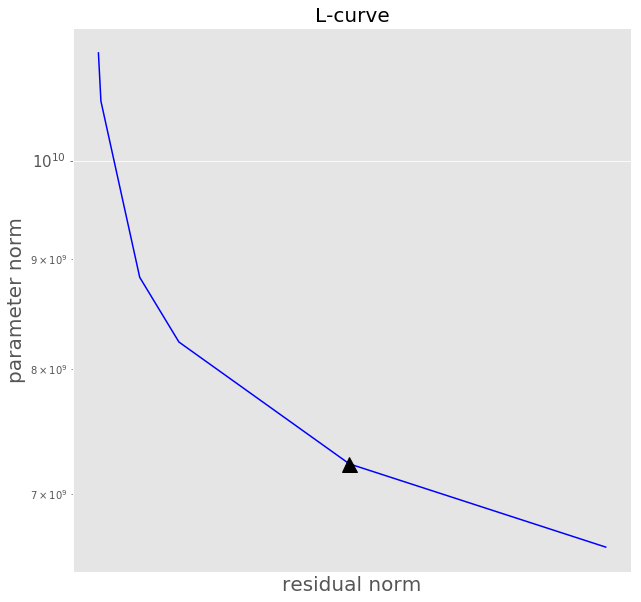

In [33]:
title_font = 20
bottom_font = 18
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(9,9), tight_layout=True)

plt.figure(figsize=(10, 10))
plt.loglog(norm_r,norm_m, 'b-')
plt.loglog(norm_r[6],norm_m[6], 'k^',markersize=15)
plt.title('L-curve', fontsize=title_font)
plt.xlabel('residual norm', fontsize = title_font)
plt.ylabel('parameter norm', fontsize = title_font)
plt.tick_params(axis='both', which='major', labelsize=15)

file_name = 'figs/airborne/Lcurve_RM'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')


plt.show()

### Results

In [29]:
result_RM_airb['magnetic_moment'] = m_est
result_RM_airb['inc_est'] = incl_est
result_RM_airb['dec_est'] = decl_est
result_RM_airb['layer_depth'] = h
result_RM_airb['reg_parameter'] = mu_list
result_RM_airb['phi'] = phi_list

### Generating .pickle file

In [30]:
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
result_RM_airb['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)

In [31]:
file_name = 'data/result_RM_airb.pickle'
with open(file_name, 'w') as f:
    pickle.dump(result_RM_airb, f)
    
saved_files.append(file_name)

### Saved files

In [32]:
with open('reports/report_%s.md' % notebook_name[:st.index(notebook_name, '.')], 'w') as q:
    q.write('# Saved files \n')
    now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
    header = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)
    q.write('\n\n'+header+'\n\n')
    for i, sf in enumerate(saved_files):
        print '%d  %s' % (i+1,sf)
        q.write('*  `%s` \n' % (sf))

1  figs/airborne/Lcurve_RM.png
2  figs/airborne/Lcurve_RM.eps
3  data/result_RM_airb.pickle
